In [1]:
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

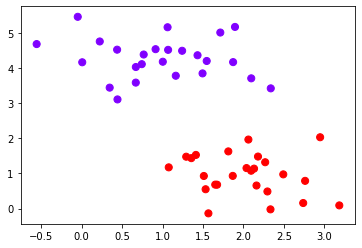

In [2]:
x,y = make_blobs(n_samples=50, centers=2
                 , random_state=0, cluster_std=0.6)
plt.scatter(x[:,0],x[:,1],c=y,s=50,cmap="rainbow")

In [3]:
def plot_svc_decision_function(model,ax=None):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    axisx = np.linspace(xlim[0],xlim[1],30)
    axisy = np.linspace(ylim[0],ylim[1],30)
    axisy,axisx = np.meshgrid(axisy,axisx)
    xy = np.vstack([axisx.ravel(),axisy.ravel()]).T
    p = model.decision_function(xy).reshape(axisx.shape)
    ax.contour(axisx,axisy,p
               ,colors="k",levels=[-1,0,1],alpha=0.5
               ,linestyles=["--","-","--"])
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

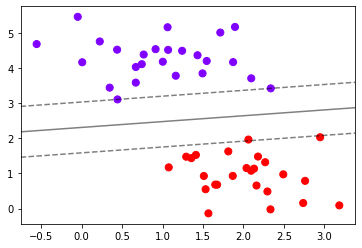

In [4]:
clf = SVC(kernel="linear").fit(x,y)
plt.scatter(x[:,0],x[:,1],c=y,s=50,cmap="rainbow")
plot_svc_decision_function(clf)

(100, 2)
(100,)


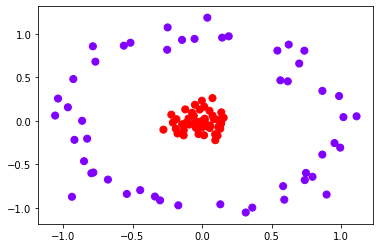

In [5]:
from sklearn.datasets import make_circles

x,y = make_circles(100,factor=0.1,noise=.1)
print(x.shape)
print(y.shape)
plt.scatter(x[:,0],x[:,1],c=y,s=50,cmap="rainbow")
plt.show()

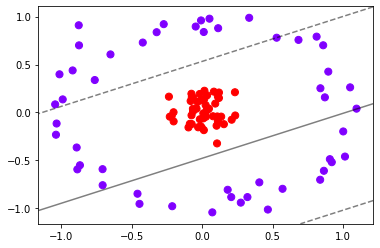

In [7]:
clf = SVC(kernel="linear").fit(x,y)
plt.scatter(x[:,0],x[:,1],c=y,s=50,cmap="rainbow")
plot_svc_decision_function(clf)

In [6]:
# 通过升维，使不能用一个超平面分割的散点可以用超平面分割
r = np.exp(-(x**2).sum(1))# 高斯镜像积和函数
rlim = np.linspace(min(r),max(r),0.2)

In [9]:
#draw a 3d graph
from mpl_toolkits import mplot3d
from ipywidgets import interact, fixed

def plot_3d(elev=30,azim=30,x=x,y=y):
    ax=plt.subplot(projection="3d")
    # 颜色“c”用标签y来赋值，意味正值一种颜色，负值一种颜色
    ax.scatter3D(x[:,0],x[:,1],r,c=y, s=50,cmap="rainbow")
    ax.view_init(elev=elev,azim=azim)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")

#     interact(plot_3d,elev=[0,30],azip=(-180,180)
#          ,x=fixed(x),y = fixed(y))


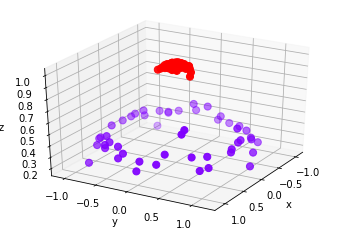

In [11]:
plot_3d()

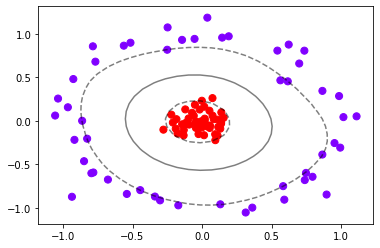

In [17]:
# rbf作为核函数，可以不手动升维，同时提高准确率
clf = SVC(kernel="rbf",gamma="scale").fit(x,y)
plt.scatter(x[:,0],x[:,1],c=y,s=50,cmap="rainbow")
plot_svc_decision_function(clf)